In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

5.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
    * Take a look at the first 10 rows. 
    * Look at the last 5 rows. Do you see a problem?
    * Redo the read_csv() call to correct this issue - **do not** modify the original csv file.

In [2]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv')
display(gdp_df.head(10))
display(gdp_df.tail())

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [3]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv', nrows = 6868)

6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [4]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [5]:
display(gdp_df.info())

# gdp_df has 6868 rows and 3 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


None

8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [6]:
display(gdp_df['Year'].value_counts())

# There's more observations for more recent years compared to earlier years.

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [7]:
display(gdp_df['Country'].value_counts())

# 238 countries are represented in this dataset, with Djibouti (7), Turks and Caicos Islands (9), and Sint Maarten (10) being the least represented in the dataset. Data collection might have been difficult for these countries.

Luxembourg                                       30
Latin America & Caribbean (IDA & IBRD)           30
Israel                                           30
Singapore                                        30
Europe & Central Asia (excluding high income)    30
                                                 ..
Nauru                                            16
Cayman Islands                                   13
Sint Maarten (Dutch part)                        10
Turks and Caicos Islands                          9
Djibouti                                          7
Name: Country, Length: 238, dtype: int64

10. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [8]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

11. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [9]:
display(gdp_2014.describe())

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

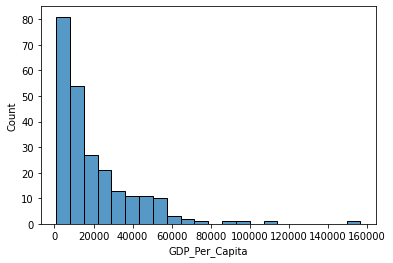

In [10]:
sns.histplot(gdp_2014['GDP_Per_Capita']);

# The distribution is right-skewed unimodal.

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [11]:
display(gdp_2014.sort_values('GDP_Per_Capita', ascending = False).head())
display(gdp_2014.sort_values('GDP_Per_Capita', ascending = True).head())

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


14. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.

In [12]:
gdp_pivoted = gdp_df.pivot_table('GDP_Per_Capita', index = 'Country', columns = 'Year')

15. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [13]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted.loc[:, 2017] - gdp_pivoted.loc[:, 1990]) / gdp_pivoted.loc[:, 1990]

16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [14]:
display(sum(gdp_pivoted['Percent_Change'] < 0))

# 17 countries experienced a negative percent change in GDP per capita from 1990 to 2017.

17

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
    **Bonus:** Put both line charts on the same plot.

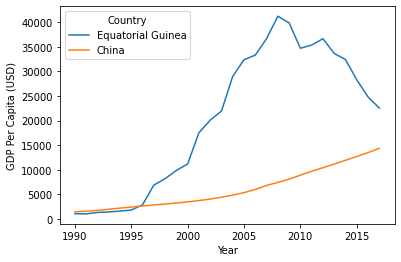

In [15]:
gdp_pivoted_sorted = gdp_pivoted.sort_values('Percent_Change', ascending = False)
gdp_pivoted_sorted.loc['Equatorial Guinea':'China', 1990:2017].T.plot()
plt.ylabel('GDP Per Capita (USD)');

# Equatorial Guinea and China had the first and second highest percent change in GDP, respectively.

18. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.


In [16]:
continents = pd.read_csv('data/continents.csv')

19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [17]:
gdp_df = continents.merge(gdp_df)

20. Determine the number of countries per continent. Create a bar chart showing this.

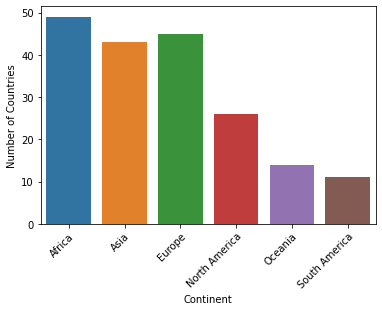

In [18]:
countries_by_continent = gdp_df.groupby('Continent').agg({'Country' : pd.Series.nunique})
sns.barplot(data = countries_by_continent, x = countries_by_continent.index, y = 'Country')
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.ylabel('Number of Countries');

21. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

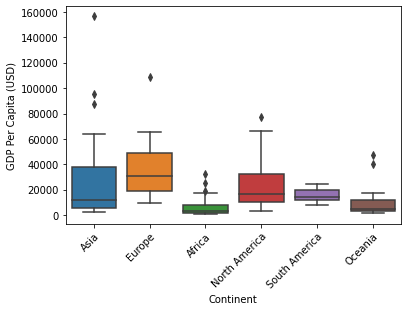

In [19]:
sns.boxplot(data = gdp_df[gdp_df['Year'] == 2014], x = 'Continent', y = 'GDP_Per_Capita')
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.ylabel('GDP Per Capita (USD)');

22. Read in internet_use.csv into a DataFrame called `internet_df`. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your `read_csv()` call to fix this. Again, **do not** modify the original datasets. 

In [20]:
internet_df = pd.read_csv('data/internet_use.csv', nrows = 4495)

23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [21]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the `Internet_Users_Pct` column is a numeric data type and fix it if it is not.

In [22]:
display(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


None

25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


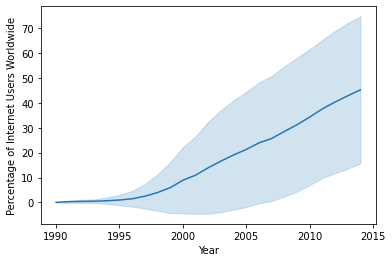

In [23]:
display(internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year'))
sns.lineplot(data = internet_df[internet_df['Year'] >= 1990], x = 'Year', y = 'Internet_Users_Pct', ci = 'sd')
plt.ylabel('Percentage of Internet Users Worldwide');

# 1990 is the first year that has non-zero internet users percentage.

26. Merge `gdp_df` and `internet_df` (on Country and Year) into a single DataFrame named `gdp_and_internet_use`. Keep only countries and years that appear in both tables.  
    **Difficult Bonus:** Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [24]:
gdp_and_internet_use = gdp_df.merge(internet_df, on = ['Country', 'Year'])

27.	Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [25]:
display(gdp_and_internet_use.head())
display(gdp_and_internet_use.tail())

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Asia,Afghanistan,2014,2102.385234,6.390000
1,Asia,Afghanistan,2013,2116.465454,5.900000
2,Asia,Afghanistan,2012,2075.491747,5.454545
3,Asia,Afghanistan,2011,1904.559799,5.000000
4,Asia,Afghanistan,2010,1957.029338,4.000000


,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3453,Africa,Zimbabwe,1997,3580.048793,0.033080
3454,Africa,Zimbabwe,1996,3520.430146,0.016790
3455,Africa,Zimbabwe,1995,3226.413930,0.007684
3456,Africa,Zimbabwe,1994,3263.934978,0.001739
3457,Africa,Zimbabwe,1990,3324.348171,0.000000


28. Create a new DataFrame, named `gdp_and_internet_use_2014` by extracting data for the year 2014 from `gdp_and_internet_use`. How many countries have at least 90% internet users in 2014?

In [26]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
display(sum(gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90))

# 13 countries have at leat 90% internet users in 2014.

13

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country.  What trends do you notice?

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1798,Europe,Luxembourg,2014,108760.916030,94.67
2542,Asia,Qatar,2014,95578.416973,91.49
2772,Asia,Singapore,2014,87808.663157,82.00


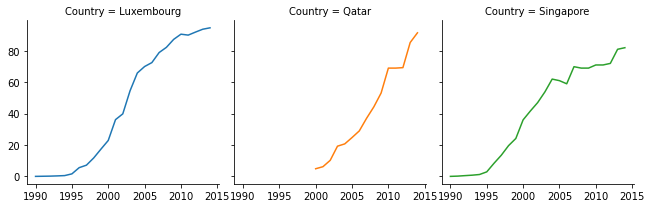

In [27]:
display(gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending = False).head(3))
grid = sns.FacetGrid(data = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Luxembourg', 'Qatar', 'Singapore'])], col = 'Country', hue = 'Country')
grid.map_dataframe(sns.lineplot, x = 'Year', y = 'Internet_Users_Pct');

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

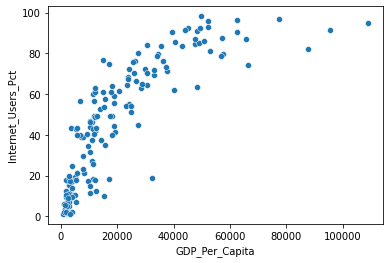

In [28]:
sns.scatterplot(data = gdp_and_internet_use_2014, x = 'GDP_Per_Capita', y = 'Internet_Users_Pct');

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [29]:
display(np.corrcoef(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct']))

array([[1.        , 0.82462672],
       [0.82462672, 1.        ]])

32. Add a column to `gdp_and_internet_use_2014` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [30]:
gdp_and_internet_use_2014['Log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])
display(np.corrcoef(gdp_and_internet_use_2014['Log_GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct']))

# Taking the log of GDP per capita returns a higher correlation coefficient.

<ipython-input-30-c800429f8ddb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['Log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


array([[1.        , 0.90398664],
       [0.90398664, 1.        ]])

33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [31]:
united_states = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']
display(np.corrcoef(united_states['GDP_Per_Capita'], united_states['Internet_Users_Pct']))

array([[1.        , 0.99166007],
       [0.99166007, 1.        ]])

### Solo Exploration and Presentation:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to merge with your data and explore. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations you find. Include visualizations and consider adding interactivity with `ipywidgets`. This presentation can be done either in a Jupyter Notebook or using another presentation software, such as PowerPoint. Check out [Jupyter Slides](https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f) if you have time. This allows you to turn your jupyter notebook into a slideshow.
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).
